In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
from matplotlib import rc

In [2]:
cmr_zipf_9010_1M_bw = 98.39  # MiB/s
cmr_uniform_1M_bw = 81.05  # MiB/s
cmr_zipf_9010_4K_bw = 2.46  # MiB/s 
cmr_uniform_4K_bw = 1.26  # MiB/s

# Series colors hash
series_colors = {
    "hasmr": "#56B4E9",
    "dmhybrid": "#CC79A7",
    "hmhybrid": "#009E73",
    "cmr": "#E69F00",
    "hmls": "#0072B2"
}

# Reference line colors hash
ref_line_colors = {
    "PRE": "#000000",
    "POST": "#666666",
    "TIME": "#999999",
    "CMR": "#332288"
}

# Reference line styles hash
ref_line_styles = {
    "PRE": "-",
    "POST": "--",
    "TIME": ":",
    "CMR": "-."
}

1022 17.033333333333335


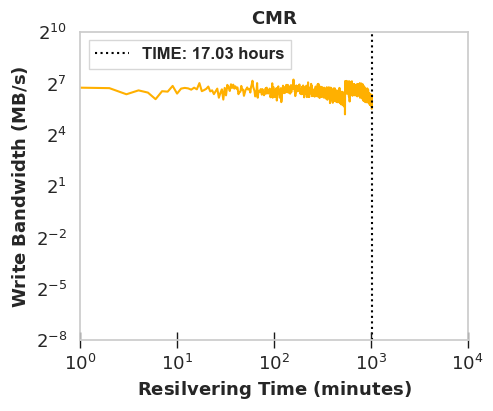

In [5]:
# df = pd.read_csv(f'/home/surbhi/measurements/zfs-resilvering-wb/writebw-cmr.csv', names=['writebw'])
df = pd.read_csv(f'fast2026/zfs/CMR/writebw_puneet.csv', names=['writebw'])
#df['writebw'] = df['writebw'].str.replace('M', '', regex=True).astype(float)

# Convert values
def convert_writebw(value):
    if 'M' in value:
        return float(value.replace('M', '')) # Just remove M
    elif 'K' in value:
        return float(value.replace('K', '')) /1024   # Convert KB to MB
    else:
        return float(value)  # Assume already in correct units

df['writebw'] = df['writebw'].apply(convert_writebw)
print(df.index.max(), df.index.max()/60.0)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 4))
plt.grid(False)
run_time = df.index.max() / 60.0  # Convert minutes (index) to hours
ax = sns.lineplot(x=df.index, y='writebw', data=df, estimator=None, errorbar=None, color='#FFB000')
ax.axvline(x=df.index.max(), color='black', linestyle=':', label='TIME: ' + str(round(run_time, 2)) + ' hours')

# plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.xlabel(r'$\bf{Resilvering~Time~(minutes)}$', fontsize=13, fontweight='semibold')
plt.ylabel(r'$\bf{Write~Bandwidth~(MB/s)}$', fontsize=13, fontweight='semibold')
plt.title(r'$\bf{CMR}$', fontsize=13)

plt.yscale('log', base=2)
ax.set_xscale('log', base=10)

def log2_format(y, pos):
    return f'$2^{{{int(np.log2(y))}}}$' if y > 0 else '0'

lowest_power_of_2 = 2 ** -8
ax.set_ylim(lowest_power_of_2 , 2**10)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(log2_format))
plt.yticks(fontsize=13)

def log10_format(y, pos):
    return f'$10^{{{int(np.log10(y))}}}$' if y > 0 else '0'

common_ticks = [10**0, 10**1, 10**2, 10**3, 10**4]
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(log10_format))
ax.set_xlim(10**0, 10**4)
plt.xticks(common_ticks,fontsize=13)
for xtick in common_ticks:
    ax.plot(xtick, 0, marker='|', markersize=12, color='k',
            transform=ax.get_xaxis_transform(), clip_on=False)

plt.legend(loc='upper left', prop={'size':12, 'weight':'semibold'},  frameon=True, fancybox=False, 
           shadow=False, framealpha=0.9, edgecolor='lightgray', fontsize=12 )

plt.savefig(f'fig/fast2026/zfs_plots/Resilvering-CMR.pdf', bbox_inches='tight', format="pdf")


5037 83.95


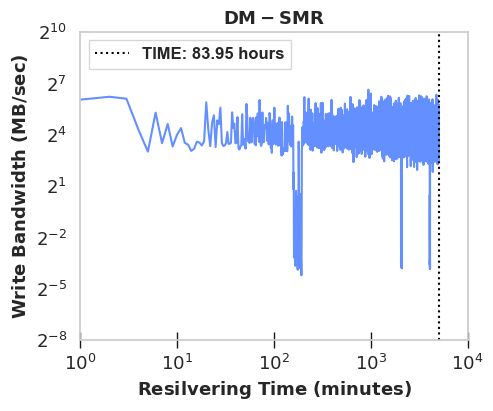

In [6]:
#df = pd.read_csv(f'/home/surbhi/measurements/zfs-resilvering-wb/writebw-dmsmr.csv', names=['writebw'])
# df = pd.read_csv(f'/home/surbhi/measurements/zfs-resilvering-status/DM-SMR/dm-smr-resilvering-bw.csv', names=['writebw'])
df = pd.read_csv(f'fast2026/zfs/DM-SMR/writebw_puneet.csv', names=['writebw'])
#df['writebw'] = df['writebw'].str.replace('M', '', regex=True).astype(float)

# Convert values
def convert_writebw(value):
    if 'M' in value:
        return float(value.replace('M', ''))  # Just remove M
    elif 'K' in value:
        return float(value.replace('K', ''))/ 1024  #convert KB to MB
    else:
        return float(value)  # Assume already in correct units

df['writebw'] = df['writebw'].apply(convert_writebw)
print(df.index.max(), df.index.max()/60.0)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 4))
plt.grid(False)
run_time = df.index.max() / 60.0  # Convert minutes (index) to hours
ax = sns.lineplot(x=df.index, y='writebw', data=df, estimator=None, errorbar=None, color='#648FFF')
ax.axvline(x=df.index.max(), color='black', linestyle=':', label='TIME: ' + str(round(run_time, 2)) + ' hours')
plt.xlabel(r'$\bf{Resilvering~Time~(minutes)}$', fontsize=13, fontweight='semibold')
plt.ylabel(r'$\bf{Write~Bandwidth~(MB/sec)}$', fontsize=13, fontweight='semibold')
plt.title(r'$\bf{DM-SMR}$', fontsize=13)
#ax.set_ylim(0 , 180000)
#ax.set_xlim(0, 6000)
#plt.yscale('log', base=2)
#set x-axis to log scale
ax.set_xscale('log')

#set y-axis to log base 2 scale
#plt.ylabel(r'$\textbf{Bandwidth (MB/s)}$', fontsize=14)
plt.yscale('log', base=2)
def log2_format(y, pos):
    return f'$2^{{{int(np.log2(y))}}}$' if y > 0 else '0'

lowest_power_of_2 = 2 ** -8
ax.set_ylim(lowest_power_of_2 , 2**10)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(log2_format))
plt.yticks(fontsize=13)

# Custom formatter to display ticks as powers of 10
def log10_format(y, pos):
    return f'$10^{{{int(np.log10(y))}}}$' if y > 0 else '0'

common_ticks = [10**exp for exp in range(0, 5)] # [1, 10, 100, 1000, 10000]
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(log10_format))
ax.set_xlim(10**0, 10**4)
plt.xticks(common_ticks, fontsize=13)
for xtick in common_ticks:
    ax.plot(xtick, 0, marker='|', markersize=12, color='k',
            transform=ax.get_xaxis_transform(), clip_on=False)

plt.legend(loc='upper left', prop={'size':12, 'weight':'semibold'},  frameon=True, fancybox=False, 
           shadow=False, framealpha=0.9, edgecolor='lightgray', fontsize=12 )

plt.savefig(f'fig/fast2026/zfs_plots/Resilvering-DMSMR.pdf', bbox_inches='tight', format="pdf")

7377 122.95
           writebw
count  7378.000000
mean     12.520295
std      17.137644
min       0.002861
25%       0.074219
50%       1.550000
75%      22.000000
max     119.000000


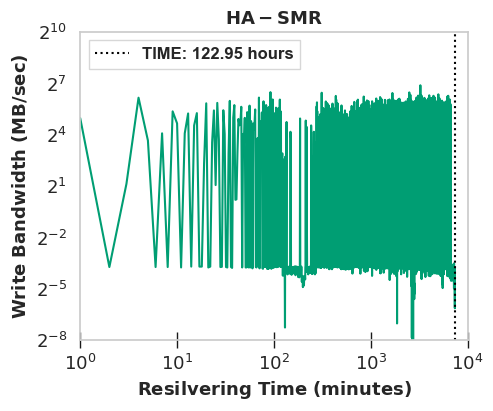

In [7]:
#df = pd.read_csv(f'/home/surbhi/measurements/zfs-resilvering-wb/writebw-hasmr.csv', names=['writebw'])
# df = pd.read_csv(f'/home/surbhi/measurements/zfs-resilvering-status/HA-SMR/ha-smr-resilver-bw.csv', names=['writebw'])
df = pd.read_csv(f'fast2026/zfs/HA-SMR/writebw_puneet.csv', names=['writebw'])
#df['writebw'] = df['writebw'].str.replace('M', '', regex=True).astype(float)

# Convert values
def convert_writebw(value):
    if 'M' in value:
        return float(value.replace('M', '')) # Remove M
    elif 'K' in value:
        return float(value.replace('K', '')) / 1024   # Convert KB to MB
    else:
        return float(value)  # Assume already in correct units

df['writebw'] = df['writebw'].apply(convert_writebw)
print(df.index.max(), df.index.max()/60.0)

print(df.describe())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 4))
plt.grid(False)
run_time = df.index.max() / 60.0  # Convert minutes (index) to hours
ax = sns.lineplot(x=df.index, y='writebw', data=df, estimator=None, errorbar=None, color='#009E73')
ax.axvline(x=df.index.max(), color='black', linestyle=':', label='TIME: ' + str(round(run_time, 2)) + ' hours')

plt.xlabel(r'$\bf{Resilvering~Time~(minutes)}$', fontsize=13, fontweight='semibold')
plt.ylabel(r'$\bf{Write~Bandwidth~(MB/sec)}$', fontsize=13, fontweight='semibold')
plt.title(r'$\bf{HA-SMR}$', fontsize=13)

#ax.set_ylim(0 , 180000)
#ax.set_xlim(0, 6000)
#plt.yscale('log', base=2)
#set x-axis to log scale
ax.set_xscale('log')
#set y-axis to log base 2 scale
#ax.set_yscale('log', base=2)
#plt.ylabel(r'$\textbf{Bandwidth (MB/s)}$', fontsize=14)
plt.yscale('log', base=2)
def log2_format(y, pos):
    return f'$2^{{{int(np.log2(y))}}}$' if y > 0 else '0'

lowest_power_of_2 = 2 ** -8
ax.set_ylim(lowest_power_of_2, 2**10)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(log2_format))
plt.yticks(fontsize=13)

# Custom formatter to display ticks as powers of 10
# Custom formatter to display ticks as powers of 10
def log10_format(y, pos):
    return f'$10^{{{int(np.log10(y))}}}$' if y > 0 else '0'

common_ticks = [10**exp for exp in range(0, 5)]  # [1, 10, 100, 1000, 10000]
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(log10_format))
ax.set_xlim(10**0, 10**4)
plt.xticks(common_ticks, fontsize=13)
for xtick in common_ticks:
    ax.plot(xtick, 0, marker='|', markersize=12, color='k',
            transform=ax.get_xaxis_transform(), clip_on=False)

plt.legend(loc='upper left', prop={'size':12, 'weight':'semibold'},  frameon=True, fancybox=False,
           shadow=False, framealpha=0.9, edgecolor='lightgray', fontsize=12 )

plt.savefig(f'fig/fast2026/zfs_plots/Resilvering-HASMR.pdf', bbox_inches='tight', format="pdf")

2943 49.05
           writebw
count  2944.000000
mean     31.367376
std      13.647228
min       0.002471
25%      25.375000
50%      33.600000
75%      40.000000
max     171.000000


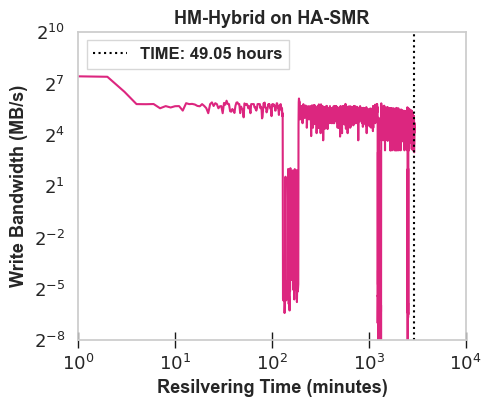

In [8]:

df = pd.read_csv(f'fast2026/zfs/HM-Hybrid/writebw_puneet.csv', names=['writebw'])

# Convert values
def convert_writebw(value):
    if 'M' in value:
        return float(value.replace('M', '')) # Remove M
    elif 'K' in value:
        return float(value.replace('K', '')) / 1024   # Convert KB to MB
    else:
        return float(value)  # Assume already in correct units

df['writebw'] = df['writebw'].apply(convert_writebw)
print(df.index.max(), df.index.max()/60.0)

print(df.describe())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 4))
plt.grid(False)
run_time = df.index.max() / 60.0
ax = sns.lineplot(x=df.index, y='writebw', data=df, estimator=None, errorbar=None,color='#DC267F')
ax.axvline(x=df.index.max(), color='black', linestyle=':', label='TIME: ' + str(round(run_time, 2)) + ' hours')

plt.xlabel("Resilvering Time (minutes)", fontsize=13, fontweight='semibold')
plt.ylabel("Write Bandwidth (MB/s)", fontsize=13, fontweight='semibold')
plt.title("HM-Hybrid on HA-SMR", fontsize=13, fontweight='semibold')
#ax.set_ylim(0 , 180000)
#ax.set_xlim(0, 6000)
#plt.yscale('log', base=2)
#set x-axis to log scale
ax.set_xscale('log')
#set y-axis to log base 2 scale
#ax.set_yscale('log', base=2)
#plt.ylabel(r'$\textbf{Bandwidth (MB/s)}$', fontsize=14)
plt.yscale('log', base=2)
def log2_format(y, pos):
    return f'$2^{{{int(np.log2(y))}}}$' if y > 0 else '0'

lowest_power_of_2 = 2 ** -8
ax.set_ylim(lowest_power_of_2, 2**10)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(log2_format))
plt.yticks(fontsize=13)

# Custom formatter to display ticks as powers of 10
# Custom formatter to display ticks as powers of 10
def log10_format(y, pos):
    return f'$10^{{{int(np.log10(y))}}}$' if y > 0 else '0'

common_ticks = [10**exp for exp in range(0, 5)]  # [1, 10, 100, 1000, 10000]
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(log10_format))
ax.set_xlim(10**0, 10**4)
plt.xticks(common_ticks, fontsize=13)
for xtick in common_ticks:
    ax.plot(xtick, 0, marker='|', markersize=12, color='k',
            transform=ax.get_xaxis_transform(), clip_on=False)

plt.legend(loc='upper left', prop={'size':12, 'weight':'semibold'},  frameon=True, fancybox=False,
           shadow=False, framealpha=0.9, edgecolor='lightgray', fontsize=12 )
    

plt.savefig(f'fig/fast2026/zfs_plots/Resilvering-HMHybrid.pdf', bbox_inches='tight', format="pdf")

632 10.533333333333333
          writebw
count  633.000000
mean   140.462085
std     22.986274
min     67.000000
25%    125.000000
50%    143.000000
75%    157.000000
max    180.000000


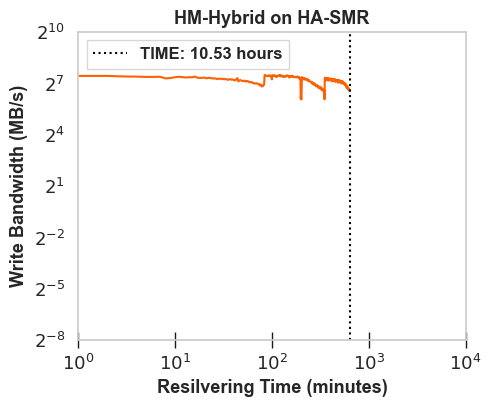

In [9]:
#df = pd.read_csv(f'/home/surbhi/measurements/zfs-resilvering-wb/writebw-hmls.csv', names=['writebw'])
# df = pd.read_csv(f'/home/surbhi/measurements/zfs-resilvering-status/HM-LS/hmls-resilver.csv', names=['writebw'])
df = pd.read_csv(f'fast2026/zfs/HM-LS/writebw_puneet.csv', names=['writebw'])
#df['writebw'] = df['writebw'].str.replace('M', '', regex=True).astype(float)

# Convert values
def convert_writebw(value):
    if 'M' in value:
        return float(value.replace('M', ''))
    elif 'K' in value:
        return float(value.replace('K', '')) / 1024   # Convert KB to MB
    else:
        return float(value)  # Assume already in correct units

df['writebw'] = df['writebw'].apply(convert_writebw)
print(df.index.max(), df.index.max()/60.0)

print(df.describe())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5, 4))
plt.grid(False)
run_time = df.index.max() / 60.0
ax = sns.lineplot(x=df.index, y='writebw', data=df, estimator=None, errorbar=None, color='#FE6100')
ax.axvline(x=df.index.max(), color='black', linestyle=':', label='TIME: ' + str(round(run_time, 2)) + ' hours')

plt.xlabel("Resilvering Time (minutes)", fontsize=13, fontweight='semibold')
plt.ylabel("Write Bandwidth (MB/s)", fontsize=13, fontweight='semibold')
plt.title("HM-Hybrid on HA-SMR", fontsize=13, fontweight='semibold')
#ax.set_ylim(0 , 180000)
#ax.set_xlim(0, 6000)
#plt.yscale('log', base=2)
#set x-axis to log scale
ax.set_xscale('log')
#set y-axis to log base 2 scale
#ax.set_yscale('log', base=2)
#plt.ylabel(r'$\textbf{Bandwidth (MB/s)}$', fontsize=14)
plt.yscale('log', base=2)
def log2_format(y, pos):
    return f'$2^{{{int(np.log2(y))}}}$' if y > 0 else '0'

lowest_power_of_2 = 2 ** -8
ax.set_ylim(lowest_power_of_2, 2**10)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(log2_format))
plt.yticks(fontsize=13)

# Custom formatter to display ticks as powers of 10
# Custom formatter to display ticks as powers of 10
def log10_format(y, pos):
    return f'$10^{{{int(np.log10(y))}}}$' if y > 0 else '0'

common_ticks = [10**exp for exp in range(0, 5)]  # [1, 10, 100, 1000, 10000]
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(log10_format))
ax.set_xlim(10**0, 10**4)
plt.xticks(common_ticks, fontsize=13)
for xtick in common_ticks:
    ax.plot(xtick, 0, marker='|', markersize=12, color='k',
            transform=ax.get_xaxis_transform(), clip_on=False)
    
plt.legend(loc='upper left', prop={'size':12, 'weight':'semibold'},  frameon=True, fancybox=False,
           shadow=False, framealpha=0.9, edgecolor='lightgray', fontsize=12 )

plt.savefig(f'fig/fast2026/zfs_plots/Resilvering-HMLS.pdf', bbox_inches='tight', format="pdf")

In [10]:
def log10_format(y, pos):
    return f'$10^{{{int(np.log10(y))}}}$' if y > 0 else '0'

def log2_format(y, pos):
    return f'$2^{{{int(np.log2(y))}}}$' if y > 0 else '0'

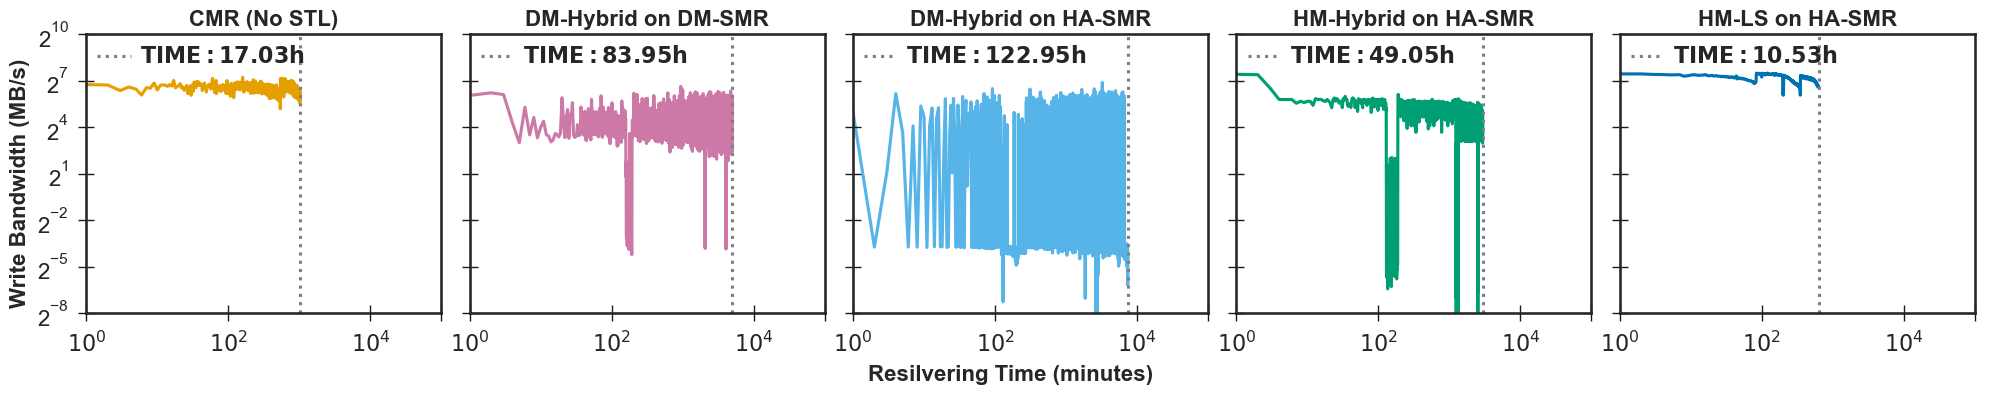

In [12]:
df1 = pd.read_csv(f'fast2026/zfs/CMR/writebw_puneet.csv', names=['writebw'])
df2 = pd.read_csv(f'fast2026/zfs/DM-SMR/writebw_puneet.csv', names=['writebw'])
df3 = pd.read_csv(f'fast2026/zfs/HA-SMR/writebw_puneet.csv', names=['writebw'])
df4 = pd.read_csv(f'fast2026/zfs/HM-Hybrid/writebw_puneet.csv', names=['writebw'])
df5 = pd.read_csv(f'fast2026/zfs/HM-LS/writebw_puneet.csv', names=['writebw'])

legends = ["CMR (No STL)", "DM-Hybrid on DM-SMR", "DM-Hybrid on HA-SMR", "HM-Hybrid on HA-SMR", "HM-LS on HA-SMR"]
colors = ['#E69F00','#CC79A7', '#56B4E9', '#009E73', '#0072B2']

# Convert values
def convert_writebw(value):
    if 'M' in value:
        return float(value.replace('M', ''))
    elif 'K' in value:
        return float(value.replace('K', '')) / 1024   # Convert KB to MB
    else:
        return float(value)  # Assume already in correct units

df1['writebw'] = df1['writebw'].apply(convert_writebw)
df2['writebw'] = df2['writebw'].apply(convert_writebw)
df3['writebw'] = df3['writebw'].apply(convert_writebw)
df4['writebw'] = df4['writebw'].apply(convert_writebw)
df5['writebw'] = df5['writebw'].apply(convert_writebw)

df_arr = [df1, df2, df3, df4, df5]

# Create subplots with shared y-axis and reduced spacing
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.02)
plt.grid(False)

# Plot each DataFrame on a separate subplot
for i, ax in enumerate(axes):
    df = df_arr[i]
    sns.lineplot(x=df.index, y='writebw', data=df, ax=ax, color=colors[i], estimator=None, errorbar=None)
    
    # Set y-axis range from 2^-8 to 2^10
    lowest_power_of_2 = 2 ** -8
    ax.set_ylim(lowest_power_of_2, 2**10)
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(log2_format))
    
    # Set x-axis to log scale
    ax.set_xscale('log')
    ax.set_yscale('log', base=2)
    
    # Add vertical line for runtime
    xmax = df.index.max()
    ax.axvline(
        x=xmax,
        color='gray',
        linestyle=':',
        label=r'$\mathbf{TIME: ' + str(round(xmax/60.0, 2)) + 'h}$'
    )
    # ax.legend(loc='upper left', fontsize=16, frameon=False, markerscale=0.5)
    ax.legend(
    loc='upper left',
    frameon=False,
    fancybox=False,
    shadow=False,
    framealpha=0.9,
    edgecolor='lightgray',
    fontsize=16,
    borderaxespad=0.0,
    borderpad=0.50,
    handlelength=1.5,     # Shorten legend handles
    handletextpad=0.4,    # 🔑 Reduce space between handle and text
    labelspacing=0.2,
    columnspacing=0.5
)
    # Set x-axis range from 10^0 to 10^5 and formatting
    common_ticks = [10**0, 10**2, 10**4, 10**5]
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(log10_format))
    ax.set_xlim(10**0, 10**5)
    ax.set_xticks(common_ticks[:-1])
    
    # Add tick marks at bottom
    for xtick in common_ticks:
        ax.plot(xtick, 0, marker='|', markersize=12, color='k',
                transform=ax.get_xaxis_transform(), clip_on=False)
    
    # Add y-axis tick markers on the left edge
    y_tick_powers = list(range(-8, 11,3))  # From 2^-8 to 2^10
    y_ticks = [2**power for power in y_tick_powers]
    ax.set_yticks(y_ticks)
    
    for ytick in y_ticks:
        ax.plot(0, ytick, marker='_', markersize=12, color='k',
                transform=ax.get_yaxis_transform(), clip_on=False)
    
    # Remove individual subplot axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelsize=16)
    
    ax.set_title(legends[i], fontsize=16, fontweight='bold')

# Set styling
# sns.set_context("notebook", font_scale=1.2)
sns.set_style("white")
sns.set_palette("muted")
sns.set_context("talk")

# Set common axis labels
fig.text(0.005, 0.5, 'Write Bandwidth (MB/s)', ha='center', va='center', rotation='vertical', fontsize=16, fontweight='bold')
fig.text(0.5, 0.02, 'Resilvering Time (minutes)', ha='center', va='center', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(wspace=0.08)

plt.savefig('fig/fast2026/Resilvering-All.pdf', bbox_inches='tight', format="pdf")
plt.show()